<a href="https://colab.research.google.com/github/SaashaJoshi/tf-keras-pytorch-examples/blob/master/PyTorch/nn.Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

In [ ]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-06-20 14:05:39--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-06-20 14:05:39 (35.9 MB/s) - ‘helper.py.1’ saved [2813/2813]



In [ ]:
# Load data
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
class Network(nn.Module):   # Subclass the class Network from nn.Module
  def __init__(self):
    super().__init__()      # Check use!

    self.hidden = nn.Linear(784, 256)   # Linear Transformation: (w.x + b)
    self.output = nn.Linear(256, 10)

    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    return x 

In [ ]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
# Or use activation 'functions' instead of activation 'modules'.
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(786, 256)
    self.output = nn.Linear(256, 10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))   # Functional definition
    x = F.softmax(slef.output(x))
    return x

In [ ]:
model = Network()
model

Network(
  (hidden): Linear(in_features=786, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
class NNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x)
    return x

model = NNetwork()
model

NNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0014,  0.0124,  0.0127,  ...,  0.0208,  0.0083,  0.0257],
        [-0.0330,  0.0254,  0.0258,  ..., -0.0178,  0.0004,  0.0354],
        [-0.0027,  0.0263,  0.0060,  ..., -0.0203,  0.0029,  0.0262],
        ...,
        [ 0.0237,  0.0244, -0.0131,  ...,  0.0095,  0.0313,  0.0338],
        [-0.0037, -0.0220,  0.0300,  ..., -0.0232,  0.0029, -0.0255],
        [-0.0138,  0.0173, -0.0044,  ...,  0.0200, -0.0146,  0.0045]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0228,  0.0264,  0.0183,  0.0150, -0.0041,  0.0059, -0.0125,  0.0178,
        -0.0186,  0.0203, -0.0159,  0.0097,  0.0230, -0.0122, -0.0200,  0.0245,
         0.0017, -0.0190,  0.0117,  0.0034,  0.0278,  0.0243, -0.0320, -0.0310,
        -0.0228, -0.0225, -0.0088,  0.0013, -0.0211,  0.0041, -0.0207, -0.0229,
         0.0279, -0.0235, -0.0300, -0.0242,  0.0162, -0.0194, -0.0110, -0.0307,
         0.0138,  0.0136, -0.0108,  0.0236, -0.0334,  0.0093,  0.0154,  0.0216,
        -0.0212

In [ ]:
data = iter(trainloader)
images, labels = data.next()
inputs = images.view(images.shape[0], 1, -1)    # inputs: (batch_size, n_channel, flatten_dimension) = (64, 1, 784)
print(inputs.shape)

torch.Size([64, 1, 784])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


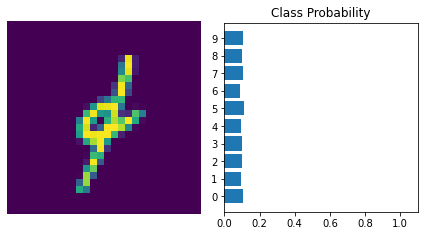

In [ ]:
import helper   # from Udacity notebooks for the bar plot.

# Forward Pass
forward_pass = model.forward(inputs[0, :])    # Calling the forward function from Network class: forward(self, x) = forward(inputs[0:])
# x = inputs[0, :] i.e. all the images (:) of the first batch (0)
# inputs[0, :] = inputs[batch_number, images_number]

img = inputs[0]
helper.view_classify(img.view(1, 28, 28), forward_pass)

In [ ]:
# Using nn.Sequential to build a neural network instead of using classes.
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model_2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_sizes[1], output_size), 
                      nn.Softmax(dim = 1))

print(model_2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [ ]:
# Using OrderedDict
from collections import OrderedDict

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model_3 = nn.Sequential(OrderedDict([
                                     ('fc1', nn.Linear(input_size, hidden_sizes[0])), 
                                     ('relu1', nn.ReLU()), 
                                     ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])), 
                                     ('relu2', nn.ReLU()), 
                                     ('fc3', nn.Linear(hidden_sizes[1], output_size)), 
                                     ('softmax', nn.Softmax(dim = 1))]))

print(model_3)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
print(model_2[4])
print(model_3.fc3)

Linear(in_features=64, out_features=10, bias=True)
Linear(in_features=64, out_features=10, bias=True)
